# Regression Analysis of second-hand cars
## Objective: to predict the price of a second-hand car depending on its specifications
## 1. Data Preprocessing
**1.1 Import Relevant Libraries and the Dataset**<br>
**1.2 Preprocessing and Data Cleaning**<br>
**1.3 Checking the OLS assumptions on Continuous variables**<br>
**1.4 Create Dummy variables**<br>

## 2. Data Analysis
**2.1 Declare the inputs and the targets**<br>
**2.2 Create the regression**<br>
**2.3 Finding the weights and bias**<br>
**2.4 Testing**<br>

## 3. Conclusion

## Data Preprocessing

### 1.1 Import Relevant Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('/Users/deltachan01/Desktop/Data Science/programming files/practical example/Second-hand cars.csv')
data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4340          yes  2014  
4341          yes  1999  
4342          yes  1985  
4343          yes  2014  
4344          yes  2013  

[4345 rows x 8 columns]

- We have a list of second-hand cars with the respective price, type of body, mileage, engine volume, engine type, production year, whether the car is registered
- The objective is to predict the price of a second car depending on its specifications

### 1.2 Preprocessing and Data Cleaning

### Exploring the descriptive statistics of the variables

In [3]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

- It seems most of the columns have 4345 observations while 'Price' and 'EngineV' have some missing values

### Dealing with missing values

In [4]:
data.isnull() # shows whether a data point is null 

Brand  Price   Body  Mileage  EngineV  Engine Type  Registration   Year
0     False  False  False    False    False        False         False  False
1     False  False  False    False    False        False         False  False
2     False  False  False    False    False        False         False  False
3     False  False  False    False    False        False         False  False
4     False  False  False    False    False        False         False  False
...     ...    ...    ...      ...      ...          ...           ...    ...
4340  False  False  False    False    False        False         False  False
4341  False  False  False    False    False        False         False  False
4342  False  False  False    False    False        False         False  False
4343  False  False  False    False     True        False         False  False
4344  False  False  False    False    False        False         False  False

[4345 rows x 8 columns]

In [5]:
data.isnull().sum() # sums all missing values and gives the number of null observations

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

- The above shows that only 'Price' and 'EngineV' have missing values
- We will remove <5% of the observations to remove the missing values

In [6]:
data_no_mv = data.dropna(axis=0) # drop missing values
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDFs

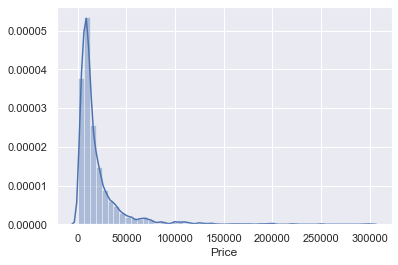

In [7]:
sns.distplot(data_no_mv['Price'])

- Examing the min, median and max of 'Price' with the above PDF
- We can observe a few outliners like 300000 that lie on abonormal distance from other observations 
- We will remove the top 1% of the observations to remove the outliners

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q] # keep the observations which are < the 99th percentile
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

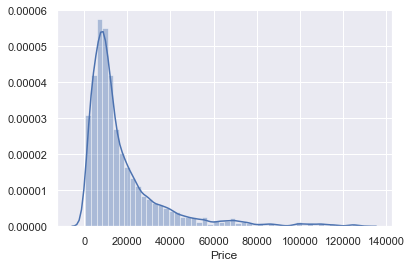

In [9]:
sns.distplot(data_1['Price'])

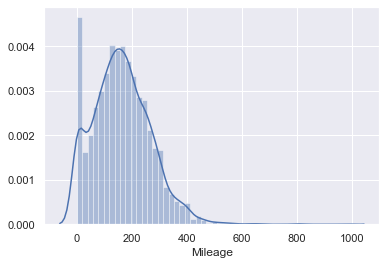

In [10]:
sns.distplot(data_no_mv['Mileage'])

- We do the same to 'Mileage'

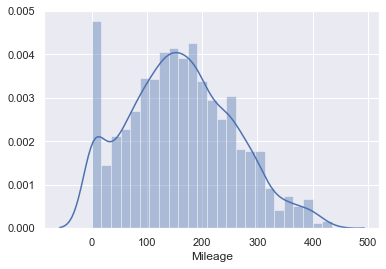

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q] # keep the observations which are < the 99th percentile
sns.distplot(data_2['Mileage'])

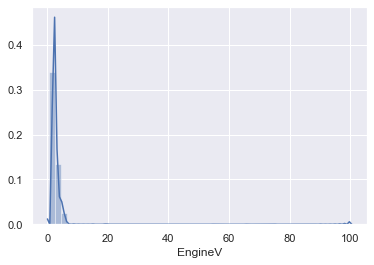

In [12]:
sns.distplot(data_no_mv['EngineV'])

In [13]:
pd.options.display.max_rows = 4350
data_no_mv.sort_values(by=['EngineV'])

Brand      Price       Body  Mileage  EngineV Engine Type  \
2512  Mercedes-Benz    3800.00      other      107     0.60      Petrol   
188             BMW   38888.00      vagon        5     0.65       Other   
345         Renault    7600.00        van      108     1.00      Diesel   
2432         Toyota   10500.00      hatch       17     1.00      Petrol   
804          Toyota   11300.00      hatch       87     1.00      Petrol   
2605         Toyota    5050.00      hatch      138     1.00      Petrol   
2646         Toyota    7500.00      hatch      135     1.00      Petrol   
1923         Toyota    5750.00      hatch      160     1.00      Petrol   
2196     Volkswagen    7000.00        van      350     1.00       Other   
2725         Toyota    3900.00      hatch      160     1.00      Petrol   
3295     Volkswagen   12650.00      hatch       11     1.00      Petrol   
3627         Toyota    7900.00      hatch       56     1.00         Gas   
1996         Toyota    8500.00      hatch       55     1.00      Petrol   
250      Volkswagen    8000.00      hatch       41     1.00      Petrol   
2214        Renault    2650.00      vagon        1     1.00      Diesel   
2769     Volkswagen    3999.00      hatch      152     1.00      Petrol   
2801         Toyota   11707.80      hatch        1     1.00      Petrol   
2508         Toyota    4650.00      hatch      170     1.00      Petrol   
117         Renault   11990.00        van      210     1.10      Diesel   
4097        Renault   12800.00      hatch      125     1.10      Diesel   
3852     Volkswagen    1950.00      hatch       94     1.10      Petrol   
3491     Volkswagen    9800.00        van       86     1.20      Petrol   
1999        Renault   11403.99      sedan        0     1.20      Petrol   
1685        Renault    3100.00      hatch      275     1.20      Petrol   
1045     Volkswagen    6000.00      hatch      195     1.20         Gas   
3187           Audi   16800.00      sedan       47     1.20      Petrol   
3667     Volkswagen   13950.00      hatch      104     1.20      Petrol   
326      Volkswagen   21000.00      hatch       22     1.20       Other   
1368        Renault    8500.00      sedan       57     1.20         Gas   
1147        Renault    9658.94      sedan        1     1.20      Petrol   
2327     Volkswagen   17200.00      other       15     1.20      Petrol   
3143        Renault   17639.47  crossover        0     1.20      Petrol   
1679           Audi   15000.00      hatch       66     1.20      Petrol   
1710           Audi   16800.00      hatch       47     1.20      Petrol   
2029        Renault    4100.00      other      270     1.20         Gas   
1656     Volkswagen   20200.00      hatch       22     1.20      Petrol   
3320           Audi   14500.00      hatch       60     1.20      Petrol   
2278        Renault   10396.23      vagon        1     1.20      Petrol   
1897     Volkswagen    9000.00      hatch      120     1.20      Diesel   
4177        Renault    9200.00      hatch       12     1.20      Petrol   
3626     Volkswagen   12700.00        van       75     1.20      Petrol   
3875     Volkswagen   16000.00      hatch       26     1.20      Petrol   
1524     Volkswagen    9999.00      hatch      118     1.20      Diesel   
3562     Volkswagen    9500.00      hatch       62     1.20      Diesel   
1951        Renault    7450.00      hatch       68     1.20      Petrol   
2519        Renault    8250.00      sedan       16     1.20      Petrol   
3271     Volkswagen    8800.00      hatch      168     1.20      Diesel   
2922     Volkswagen   10000.00        van       71     1.20      Petrol   
1276        Renault    8299.00      sedan       19     1.20      Petrol   
645          Toyota    2800.00      sedan      287     1.30      Petrol   
4149     Mitsubishi    5850.00      hatch      130     1.30      Petrol   
2211     Mitsubishi    1600.00      vagon      185     1.30      Petrol   
485          Toyota    6900.00      hat

- The distribution is strange, we should check manually
- Some of the values wrong and some are assigned 99.99 to label missing values
- Car volume are usually below 6.51

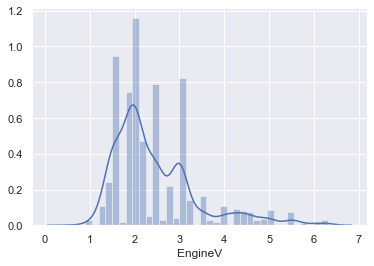

In [14]:
data_3 = data_2[data_2['EngineV']<6.5] # keep the observations which are < 6.5
sns.distplot(data_3['EngineV'])

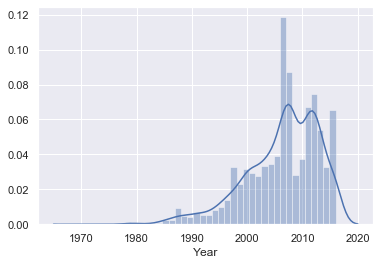

In [15]:
sns.distplot(data_no_mv['Year'])


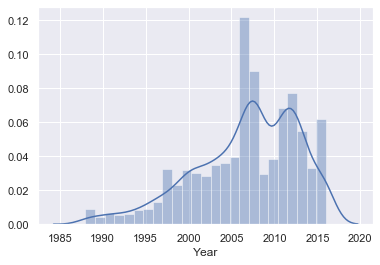

In [16]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q] # keep the observations which are > 1st percentile
sns.distplot(data_4['Year'])


In [17]:
data_cleaned = data_4.reset_index(drop=True) # reset the index of observations
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### 1.3 Checking the OLS assumptions on Continuous variables

### Linearity

Plot the scatterplots of 'Price' and 'Year', 'Price' and 'EngineV', 'Price and Mileage'

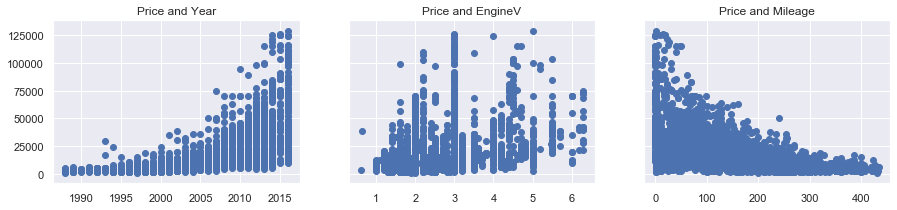

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

- They are not linear reslationships and we cannot perform linear regression


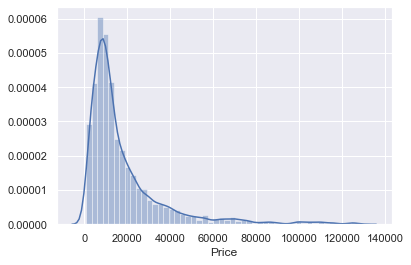

In [19]:
sns.distplot(data_cleaned['Price'])


- The PDF of 'Price' also supports it is an exponential distribution
- Therefore, we will perform log transformation on 'Price'

In [20]:
log_price = np.log(data_cleaned['Price']) # transform 'Price' with a log transformation
data_cleaned['log_price'] = log_price # add log_price to our data frame
data_cleaned

Brand      Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz    7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz   13300.00      sedan      358     5.00         Gas   
3              Audi   23000.00  crossover      240     4.20      Petrol   
4            Toyota   18300.00  crossover      120     2.00      Petrol   
5              Audi   14200.00      vagon      200     2.70      Diesel   
6           Renault   10799.00      vagon      193     1.50      Diesel   
7        Volkswagen    1400.00      other      212     1.80         Gas   
8           Renault   11950.00      vagon      177     1.50      Diesel   
9           Renault    2500.00      sedan      260     1.79      Petrol   
10             Audi    9500.00      vagon      165     2.70         Gas   
11       Volkswagen   10500.00      sedan      100     1.80      Petrol   
12           Toyota   16000.00  crossover      250     4.70         Gas   
13          Renault    8600.00      hatch       84     1.50      Diesel   
14              BMW    2990.00      other      203     2.00      Petrol   
15           Toyota   26500.00  crossover       21     2.00      Petrol   
16             Audi    3500.00      vagon      250     2.50      Diesel   
17           Toyota   38233.00      other        0     2.40      Diesel   
18       Volkswagen    7500.00      hatch      132     1.40      Diesel   
19             Audi    6800.00      sedan      225     2.40         Gas   
20       Mitsubishi   10500.00  crossover      130     2.40         Gas   
21             Audi   24900.00      sedan      163     4.20      Diesel   
22       Volkswagen   20800.00  crossover      151     3.00      Diesel   
23             Audi    6500.00      sedan      330     2.40      Petrol   
24    Mercedes-Benz   13566.00      other      171     2.20       Other   
25       Mitsubishi    8500.00      hatch       65     1.30      Petrol   
26             Audi    2900.00      sedan        1     2.30         Gas   
27              BMW   21500.00      other       72     3.00      Petrol   
28       Mitsubishi   17900.00  crossover       87     3.80         Gas   
29              BMW   28500.00  crossover      160     4.80         Gas   
30       Volkswagen    9800.00        van      160     1.90      Diesel   
31           Toyota   14500.00      sedan      147     2.40         Gas   
32              BMW    6000.00      sedan      300     2.80      Petrol   
33              BMW   67500.00  crossover        1     2.50      Diesel   
34             Audi   33900.00      other       14     1.80      Petrol   
35    Mercedes-Benz    9800.00        van      230     2.15      Diesel   
36    Mercedes-Benz   63000.00  crossover       86     5.50      Petrol   
37              BMW    7700.00      sedan      326     2.80      Petrol   
38    Mercedes-Benz    9600.00        van       30     2.20      Diesel   
39           Toyota   12800.00      sedan      181     2.40      Petrol   
40              BMW   41000.00  crossover       80     3.00      Petrol   
41              BMW    3700.00      sedan      231     2.50      Petrol   
42    Mercedes-Benz   29500.00      sedan      134     5.00      Petrol   
43              BMW    6500.00      sedan      335     2.80      Petrol   
44          Renault    8250.00        van       66     1.50      Diesel   
45    Mercedes-Benz   19500.00  crossover      172     3.50       Other   
46    Mercedes-Benz   13500.00      sedan      317     5.00      Petrol   
47    Mercedes-Benz    9200.00        van      266     2.20      Diesel   
48       Volkswagen    5000.00      vagon      265     2.00      Diesel   
49              BMW   23900.00  crossover      162     4.80      Petrol   
50              BMW   36900.00      sedan       81     3.00      Diesel   
51              BMW    8900.00      other      253     1.80      Petrol   
52          Renault    7800.00        v

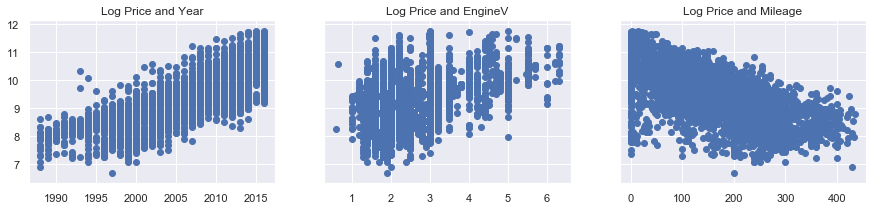

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

- Check the three scatters again
- The relationships are close to linear relationship
- We can perform linear regression

In [22]:
data_cleaned = data_cleaned.drop(['Price'],axis=1) 
# we will be using the log price variable, we drop the old 'Price' one

### Endogeneity

- To find if the residuals are correlated to the variable x
- To find if there is an omitted variable
- We will look at this after the regression model is finished

### Normality and Homoscedasticity
- Normality is assumed because this is a big sample following the central limit theorem
- The zero mean of the distribution of errors is accomplished by the inclusion of the intercept in the regression 
- Homoscedasticity generally hold after implementing the log transformation. Errors generally have equal variance according to the plots below

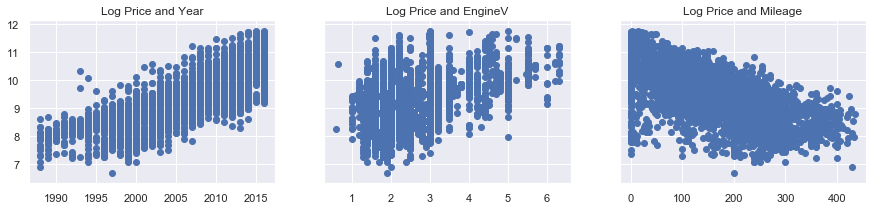

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

### No autocorrelation
- The observations we have are not coming from time series data or panel data.
- They are a snapshot of the current situation at a second-hand car sales website
- Logically, there is no reason for the errors to be correlated

### Multicollinearity

- We can expect some degree of multicollinearity because mileage and production year are correlated
- The newer the car, the lower the mileage
- We use VIF(variance inflation factor) to check multicollinearity


In [24]:
data_cleaned.columns.values # check the columns of our data frame

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']] # declare a variable where we put
# all features where we want to check for multicollinearity

vif = pd.DataFrame() # we create a new data frame which will include all the VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

- The VIF of 'Year' is >10
- It is definitely correlated to other variables
- Therefore, we will drop the 'Year' feature

In [26]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1) # drop 'Year'

### 1.4 Create Dummy variables

In [27]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) # create dummies
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

In [28]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [29]:
# rerrange the values to make our dataframe more organised
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'] 
# declare a new variable that will contain the preferred order

In [30]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## 2. Data Analysis - Linear Regression Model
### 2.1 Declare the inputs and the targets

In [31]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1) 
# the inputs are everything but the dependent variable 'log_price'

### Scale the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create a scaler object
scaler.fit(inputs) # fit the inputs 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
inputs_scaled = scaler.transform(inputs) # scale the features and store them in a new variable

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=1)
# split the variables with an 80-20 split and some random state

### 2.2 Create the regression

In [35]:
reg = LinearRegression() # create a linear regression object
reg.fit(x_train,y_train) # train the regression model with x_train and y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_hat = reg.predict(x_train) # output of regression

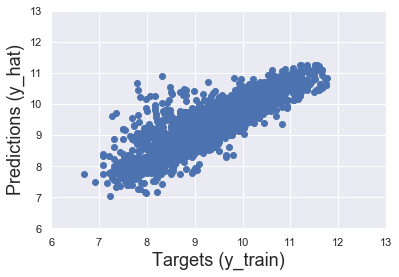

In [37]:
# plot them on a scatter plot to compare the targets (y_train) and the predictions (y_hat) 
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

- The closer the points to the 45-degree line, the better the prediction
- our model is close to 45-degree line moderately

### Check the residuals

Text(0.5, 1.0, 'Residuals PDF')

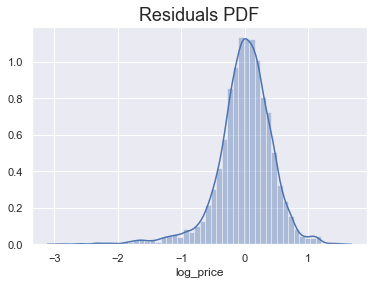

In [38]:
# plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

- In the best-case scenario, this plot should be normally distributed
- In our case, we notice that there are many negative residuals (far away from the mean)
- Given the definition of the residuals (y_train - y_hat), negative values imply that some y_hat (predictions) are much higher than y_train (the targets)<br>This is an overestimation
- It generally matches **Normality and Homoscedasticity**


In [39]:
reg.score(x_train,y_train) # find the R-squared of the model

0.7474745957984673

- our model explained 74.7% of the result

### 2.3 Finding the weights and bias¶

In [40]:
reg.intercept_ # obtain the bias (intercept) of the regression

9.41300896059139

In [41]:
reg.coef_ # obtain the weights (coefficients) of the regression

array([-0.45200303,  0.20862879,  0.01457049,  0.01191086, -0.13670226,
       -0.1795674 , -0.05210005, -0.08672276, -0.1477278 , -0.10494319,
       -0.19856314, -0.12948012, -0.17301821, -0.1264255 , -0.02861559,
       -0.15061999,  0.31720349])

In [42]:
# create a regression summary 
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.452003
1               EngineV  0.208629
2             Brand_BMW  0.014570
3   Brand_Mercedes-Benz  0.011911
4      Brand_Mitsubishi -0.136702
5         Brand_Renault -0.179567
6          Brand_Toyota -0.052100
7      Brand_Volkswagen -0.086723
8            Body_hatch -0.147728
9            Body_other -0.104943
10           Body_sedan -0.198563
11           Body_vagon -0.129480
12             Body_van -0.173018
13      Engine Type_Gas -0.126425
14    Engine Type_Other -0.028616
15   Engine Type_Petrol -0.150620
16     Registration_yes  0.317203

Continuous variable
- The dependent variable is a logarithm and all features are standardized including the dummies
- Mileage has the biggest impact
- A positive weight shows that as a feature increases in value, log_price and 'Price' increase e.g. EngineV
- A negative weight shows that as a feature increases in value, log_price and 'Price' decrease e.g. Mileage

Dummy Variable
- We need to identify the benchmark (the dummy dropped) to analyse the models
- Audi is the dummy dropped, it is the benchmark
- A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi)
- A negative weight shows that the respective category (Brand) is less expensive than the benchmark (Audi)

#### Identify the benchmark

In [43]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

- The benchmark is 'Audi'

In [44]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

- The benchmark is 'crossover'

In [45]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

- The benchmark is 'Diesel'

In [46]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

- The benchmark is 'No'

### 2.4 Testing

In [47]:
y_hat_test = reg.predict(x_test) # the test inputs are 'x_test'

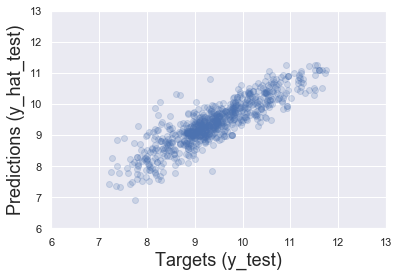

In [48]:
# create a scatter plot with the test targets and the test predictions (y_test and y_hat_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

- For higher prices: we have a higher concentration of values around the 45 degree line, so the model is good at predicting higher prices
- For lower prices: they are much more scattered around the 45 degree line


### Examine the Residuals
#### OLS is based on minimizing sum of squared residuals

In [49]:
# manually check these predictions
# take the exponential of the log_price to get the actual price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True) # reset the index of y_hat
df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction'] # calculate the residuals
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100) # take the absolute difference in %
df_pf

Prediction     Target      Residual  Difference%
0    12856.212193   10000.00  -2856.212193    28.562122
1     3183.075661    3100.00    -83.075661     2.679860
2    11963.935886    8200.00  -3763.935886    45.901657
3     5174.695930    5300.00    125.304070     2.364228
4     7950.055496    8200.00    249.944504     3.048104
5     7397.640443    5050.00  -2347.640443    46.487930
6    13398.075132   11500.00  -1898.075132    16.505001
7    29483.126210   99000.00  69516.873790    70.219064
8     5861.274129    6500.00    638.725871     9.826552
9    11647.887259   11500.00   -147.887259     1.285976
10    7615.940454   10200.00   2584.059546    25.333917
11   13076.041996   16999.00   3922.958004    23.077581
12   29523.603110    5900.00 -23623.603110   400.400053
13    3697.151724    2999.00   -698.151724    23.279484
14    3498.689709    2899.00   -599.689709    20.686089
15   14260.172275   16500.00   2239.827725    13.574713
16   12490.628518   12500.00      9.371482     0.074972
17    9561.393995    8950.00   -611.393995     6.831218
18   16360.538556   14200.00  -2160.538556    15.215060
19    8060.861618    7600.00   -460.861618     6.063969
20    6021.736917    2600.00  -3421.736917   131.605266
21   33636.028688   38233.00   4596.971312    12.023569
22    8718.416042    7800.00   -918.416042    11.774565
23    8329.378051   10900.00   2570.621949    23.583688
24   10467.197802    9999.00   -468.197802     4.682446
25   30727.301520   42000.00  11272.698480    26.839758
26    9672.788622   12900.00   3227.211378    25.017142
27    5150.083282    7000.00   1849.916718    26.427382
28    1662.044727    2100.00    437.955273    20.855013
29    8913.651263    8500.00   -413.651263     4.866485
30   14698.680423   13700.00   -998.680423     7.289638
31    4716.072898    2800.00  -1916.072898    68.431175
32    5038.467812    4700.00   -338.467812     7.201443
33    5027.437019    5400.00    372.562981     6.899314
34   77201.800186   55000.00 -22201.800186    40.366909
35   11113.082584   21500.00  10386.917416    48.311244
36   10631.882372   12300.00   1668.117628    13.561932
37   10197.744181   12500.00   2302.255819    18.418047
38   10296.562240    8200.00  -2096.562240    25.567832
39   12352.608575   11700.00   -652.608575     5.577851
40    5379.731913    4500.00   -879.731913    19.549598
41    3186.305834    3050.00   -136.305834     4.469044
42    7811.654560    8350.00    538.345440     6.447251
43   11049.349952   12500.00   1450.650048    11.605200
44   17402.779030   29500.00  12097.220970    41.007529
45    8804.850302    7500.00  -1304.850302    17.398004
46    9006.630080    6800.00  -2206.630080    32.450442
47   18858.413758   32500.00  13641.586242    41.974112
48   11183.376534   13900.00   2716.623466    19.544054
49    5760.880460   11999.00   6238.119540    51.988662
50   29922.250461    5500.00 -24422.250461   444.040917
51   17575.037826   11400.00  -6175.037826    54.166998
52   18736.394197   17900.00   -836.394197     4.672593
53   13172.684421   22200.00   9027.315579    40.663584
54    8341.262987   11000.00   2658.737013    24.170336
55    6437.620217    4900.00  -1537.620217    31.380004
56    7688.283449    7400.00   -288.283449     3.895722
57    7890.799532   14900.00   7009.200468    47.041614
58    7776.486058    2899.00  -4877.486058   168.247191
59   12196.999663   19999.00   7802.000337    39.011952
60    2985.911333    1600.00  -1385.911333    86.619458
61   14086.465568   14800.00    713.534432     4.821179
62   39927.688321   44800.00   4872.311679    10.875696
63   24504.209753   38600.00  14095.790247    36.517591
64   34177.682352   36000.00   1822.317648     5.061993
65    8070.856962   11700.00   3629.143038    31.018317
66   13698.475934    9500.00  -4198.475934    44.194484
67    7067.454007   14000.00   6932.545993    49.518186
68   15050.003828   15000.00    -50.003828     0.333359
69    1783.280991    2199.00    415.719009    18.904912
70    4983.072834    4600.00   

In [50]:
df_pf.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   15588.284961   17829.164470   2240.879509    34.733783
std    12854.477502   19197.466739  10612.802532    48.094590
min      988.146064    1350.000000 -37977.950694     0.043926
25%     7789.436897    7000.000000  -2096.180124    10.606456
50%    11565.008443   11000.000000    125.705740    23.641237
75%    19067.389782   20777.812500   3113.728832    42.091317
max    77201.800186  124999.000000  78535.390902   495.980076

- Observing the min, Q1, median and Q3 of Difference%. Most of our predictions we got are relatively close
- But the max of Difference% is very big

#### Sort by difference% to check the residuals

In [51]:
pd.options.display.max_rows = 999 # display all rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display the result with only 2 digits after the dot 
df_pf.sort_values(by=['Difference%']) # we sort by difference in % and manually check the model


Prediction    Target  Residual  Difference%
73      7503.29   7500.00     -3.29         0.04
16     12490.63  12500.00      9.37         0.07
95     10565.21  10600.00     34.79         0.33
68     15050.00  15000.00    -50.00         0.33
617    18237.05  18300.00     62.95         0.34
460    17417.67  17500.00     82.33         0.47
642     7949.30   7900.00    -49.30         0.62
734     8739.24   8800.00     60.76         0.69
366    42227.76  41900.00   -327.76         0.78
191    13020.24  12900.00   -120.24         0.93
250    23428.24  23200.00   -228.24         0.98
721    17821.13  17639.47   -181.66         1.03
280    12655.55  12800.00    144.45         1.13
318    11630.09  11500.00   -130.09         1.13
451    13350.25  13200.00   -150.25         1.14
621     7589.82   7500.00    -89.82         1.20
516    10866.23  10999.00    132.77         1.21
249    14683.30  14500.00   -183.30         1.26
595     8608.18   8500.00   -108.18         1.27
9      11647.89  11500.00   -147.89         1.29
507     1572.02   1550.00    -22.02         1.42
761     8013.04   7900.00   -113.04         1.43
319     6096.48   6000.00    -96.48         1.61
83      9044.99   8900.00   -144.99         1.63
235     6613.94   6500.00   -113.94         1.75
448    37561.92  38300.00    738.08         1.93
184    12756.26  12500.00   -256.26         2.05
391    10479.30  10700.00    220.70         2.06
206     6072.74   5950.00   -122.74         2.06
476    12229.59  12499.00    269.41         2.16
287    11131.23  10888.00   -243.23         2.23
711    28293.12  28950.00    656.88         2.27
3       5174.70   5300.00    125.30         2.36
498     8001.49   8200.00    198.51         2.42
397     7894.53   7700.00   -194.53         2.53
615    12569.01  12900.00    330.99         2.57
369    11235.07  10950.00   -285.07         2.60
623    11086.94  10800.00   -286.94         2.66
593    16060.21  16500.00    439.79         2.67
1       3183.08   3100.00    -83.08         2.68
157    13323.11  13700.00    376.89         2.75
508     3011.07   3100.00     88.93         2.87
408    19451.49  18900.00   -551.49         2.92
683     6693.49   6500.00   -193.49         2.98
575    26782.20  25999.00   -783.20         3.01
4       7950.06   8200.00    249.94         3.05
133     9173.18   8900.00   -273.18         3.07
125    27750.75  26900.00   -850.75         3.16
512     6089.74   6300.00    210.26         3.34
741    27718.29  28700.00    981.71         3.42
458     9653.01   9999.00    345.99         3.46
635     9168.33   9500.00    331.67         3.49
284     4771.84   4950.00    178.16         3.60
485     7788.39   7500.00   -288.39         3.85
380    25242.75  24300.00   -942.75         3.88
56      7688.28   7400.00   -288.28         3.90
659     4996.72   5200.00    203.28         3.91
295    41565.58  39999.00  -1566.58         3.92
338     8166.63   8500.00    333.37         3.92
241    10565.21  11000.00    434.79         3.95
455     9217.73   9600.00    382.27         3.98
546    12480.98  13000.00    519.02         3.99
87     13105.97  12600.00   -505.97         4.02
176    22928.11  23900.00    971.89         4.07
543     9991.06   9599.00   -392.06         4.08
328    20140.71  21000.00    859.29         4.09
502    16975.29  17700.00    724.71         4.09
181     6617.18   6900.00    282.82         4.10
520    12451.81  11960.00   -491.81         4.11
739     6147.52   5900.00   -247.52         4.20
420    15323.56  16000.00    676.44         4.23
555    54587.95  57000.00   2412.05         4.23
716    51625.52  49500.00  -2125.52         4.29
749    12439.68  13000.00    560.32         4.31
755    10223.28   9800.00   -423.28         4.32
501     4303.61   4500.00    196.39         4.36
41      3186.31   3050.00   -136.31         4.47
156    11086.02  10600.00   -486.02         4.59
52     18736.39  17900.00   -836.39         4.67
24     10467.20   9999.00   -468.20         4.68
497    17484.71  16700.00   -784.71 

- Look at the bottom of the table. The difference% are very big. Most observed prices are low (targets are low). The residuals at the bottom are negative. Predictions are higher than the targets (overestimation)


## 3. Conclusion
- 'Mileage' has the biggest impact in this model
- This model is good for most of the predictions but bad for the bottom targets in the above table
- Our model is using the mileage, engine volume, brand, engine type, registration and body type to predict the price of a used car
- An explanation about the overestimation may be that we are missing an important factor (omitted variable) which drives the price of a used car lower **(Endogeneity)**
- Maybe these cars were damaged in some way so the price is overestimated, but this model does not include 'Damage' this factor.
